# ML ASSIGNMENT 3
• SHREYA CHETAN PAWASKAR

• pawaskas@uci.edu

• STUDENT ID: 12041645

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [41]:
ls

drive/  image1.png  iris.txt  logisticClassify2.py  mltools/  __pycache__/  sample_data/


In [42]:
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml
from logisticClassify2 import *

In [43]:
iris = np.genfromtxt("iris.txt",delimiter=None)

X, Y = iris[:,0:2], iris[:,-1] # get first two features & target
X, Y = ml.shuffleData(X, Y)                     # reorder randomly (important later)
X,_ = ml.rescale(X)                                # works much better on rescaled data
XA, YA = X[Y<2,:], Y[Y<2]                       # get class 0 vs 1
XB, YB = X[Y>0,:], Y[Y>0]                       # get class 1 vs 2

### **Task 1**
Show the two classes in a scatter plot (one for each data set) and verify that one data set is linearly separable while the other is not.

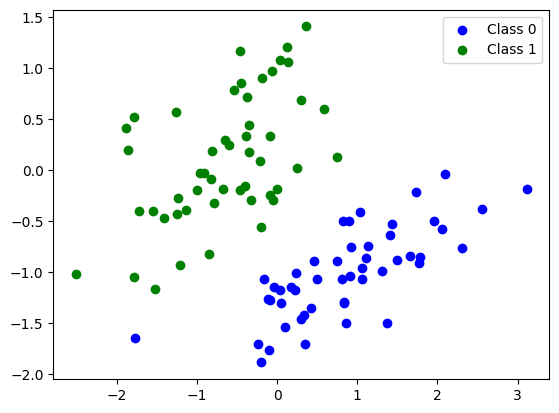

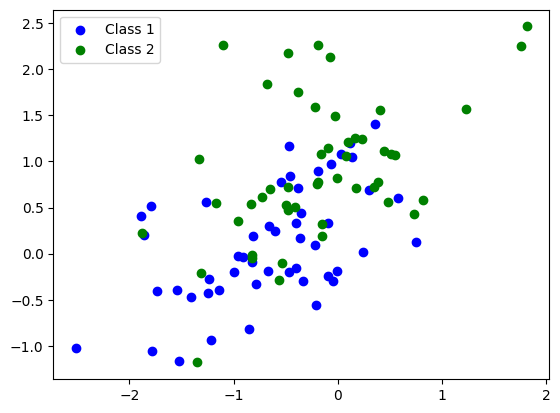

In [44]:
plt.scatter(XA[YA == 0,0], XA[YA == 0,1], color = 'blue' , label = 'Class 0')
plt.scatter(XA[YA == 1,0], XA[YA == 1,1], color = 'green' , label = 'Class 1')
plt.legend()
plt.show()

plt.scatter(XB[YB == 1,0], XB[YB == 1,1], color = 'blue' , label = 'Class 1')
plt.scatter(XB[YB == 2,0], XB[YB == 2,1], color = 'green' , label = 'Class 2')
plt.legend()
plt.show()

### **Task 2**

In [45]:
ls

drive/  image1.png  iris.txt  logisticClassify2.py  mltools/  __pycache__/  sample_data/


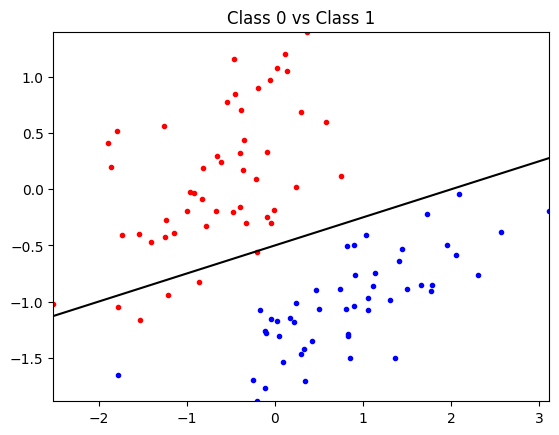

In [46]:
import logisticClassify2 as lc2

learner = lc2.logisticClassify2();
learner.classes = np.unique(YA)
wts = np.array([0.5,-0.25,1])
learner.theta = wts

plt.title("Class 0 vs Class 1")
learner.plotBoundary(XA,YA)
plt.show()

In [47]:
learner.classes = np.unique(YA)
wts = np.array([0.5,-0.25,1])
learner.theta = wts

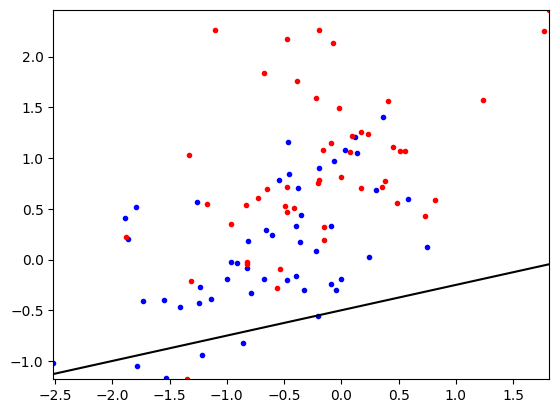

In [48]:
learnerB = logisticClassify2()
learnerB.theta = wts
learnerB.classes = np.unique(YB)
learnerB.plotBoundary(XB,YB)

### **Task 3**
Complete the logisticClassify2.predict function to make predictions for your classifier.



```
    def predict(self, X):
        """ Return the predictied class of each data point in X"""
        ## TODO: compute linear response r[i] = theta0 + theta1 X[i,1] + theta2 X[i,2] + ... for each i
        ## TODO: if z[i] > 0, predict class 1:  Yhat[i] = self.classes[1]
        ##       else predict class 0:  Yhat[i] = self.classes[0]
        Z = self.theta[0] + X.dot(self.theta[1:])
        Yhat = np.asarray(self.classes)[(Z > 0).astype(int)]
        return Yhat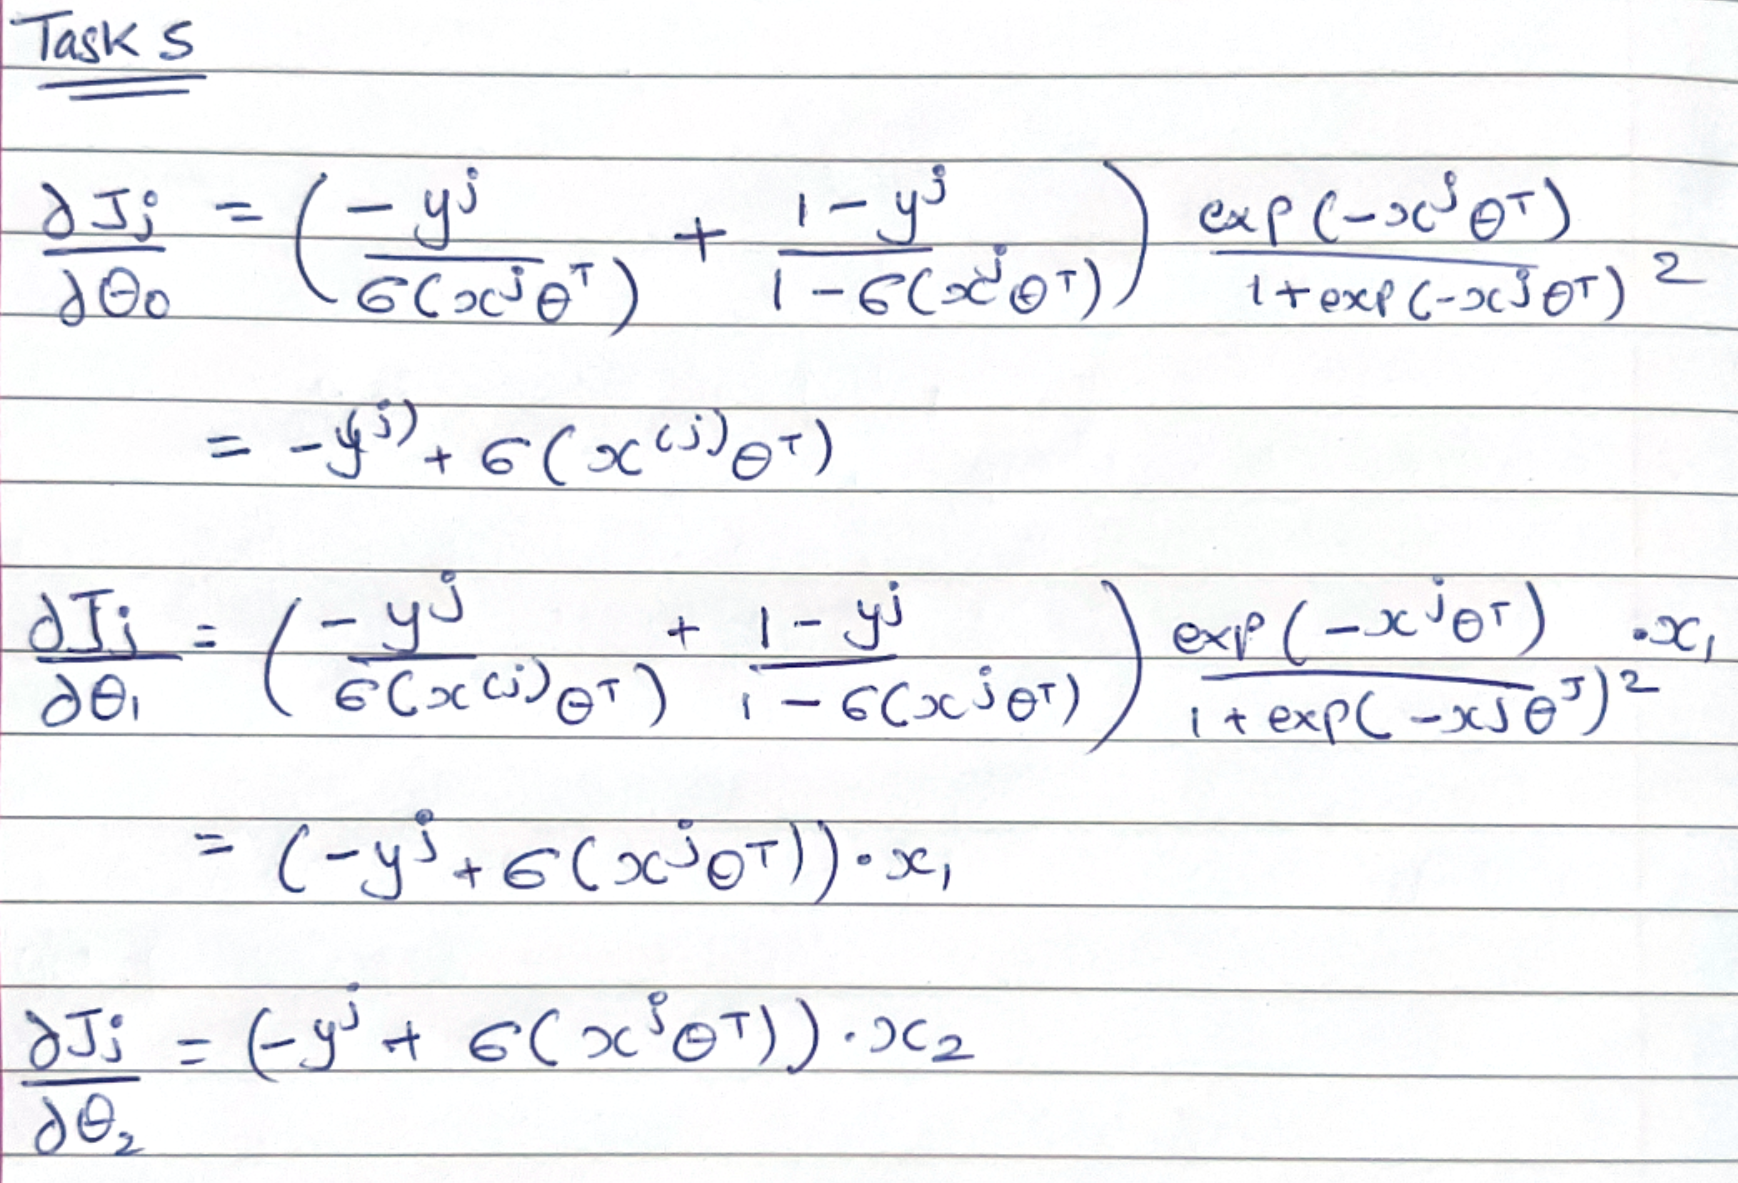
```



In [49]:
print("Error A: ", learner.err(XA, YA))

Error A:  0.050505050505050504


In [50]:
print("Error B: ", learnerB.err(XB, YB))

Error B:  0.46464646464646464


### **Task 4**

Verify that your predict code matches your boundary plot by using plotClassify2D with your manually constructed learner on the two data sets.

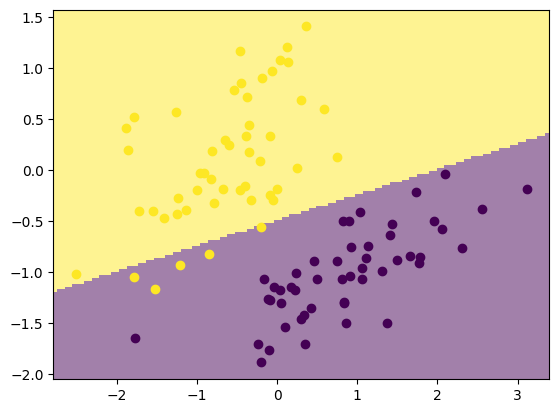

In [51]:
ml.plotClassify2D(learner,XA,YA)

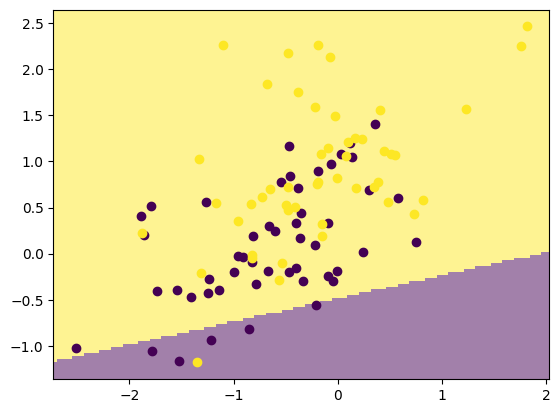

In [52]:
ml.plotClassify2D(learnerB,XB,YB)

We can see that boundary plot for Task 2 matches with plotClassify2D

### **Task 5**

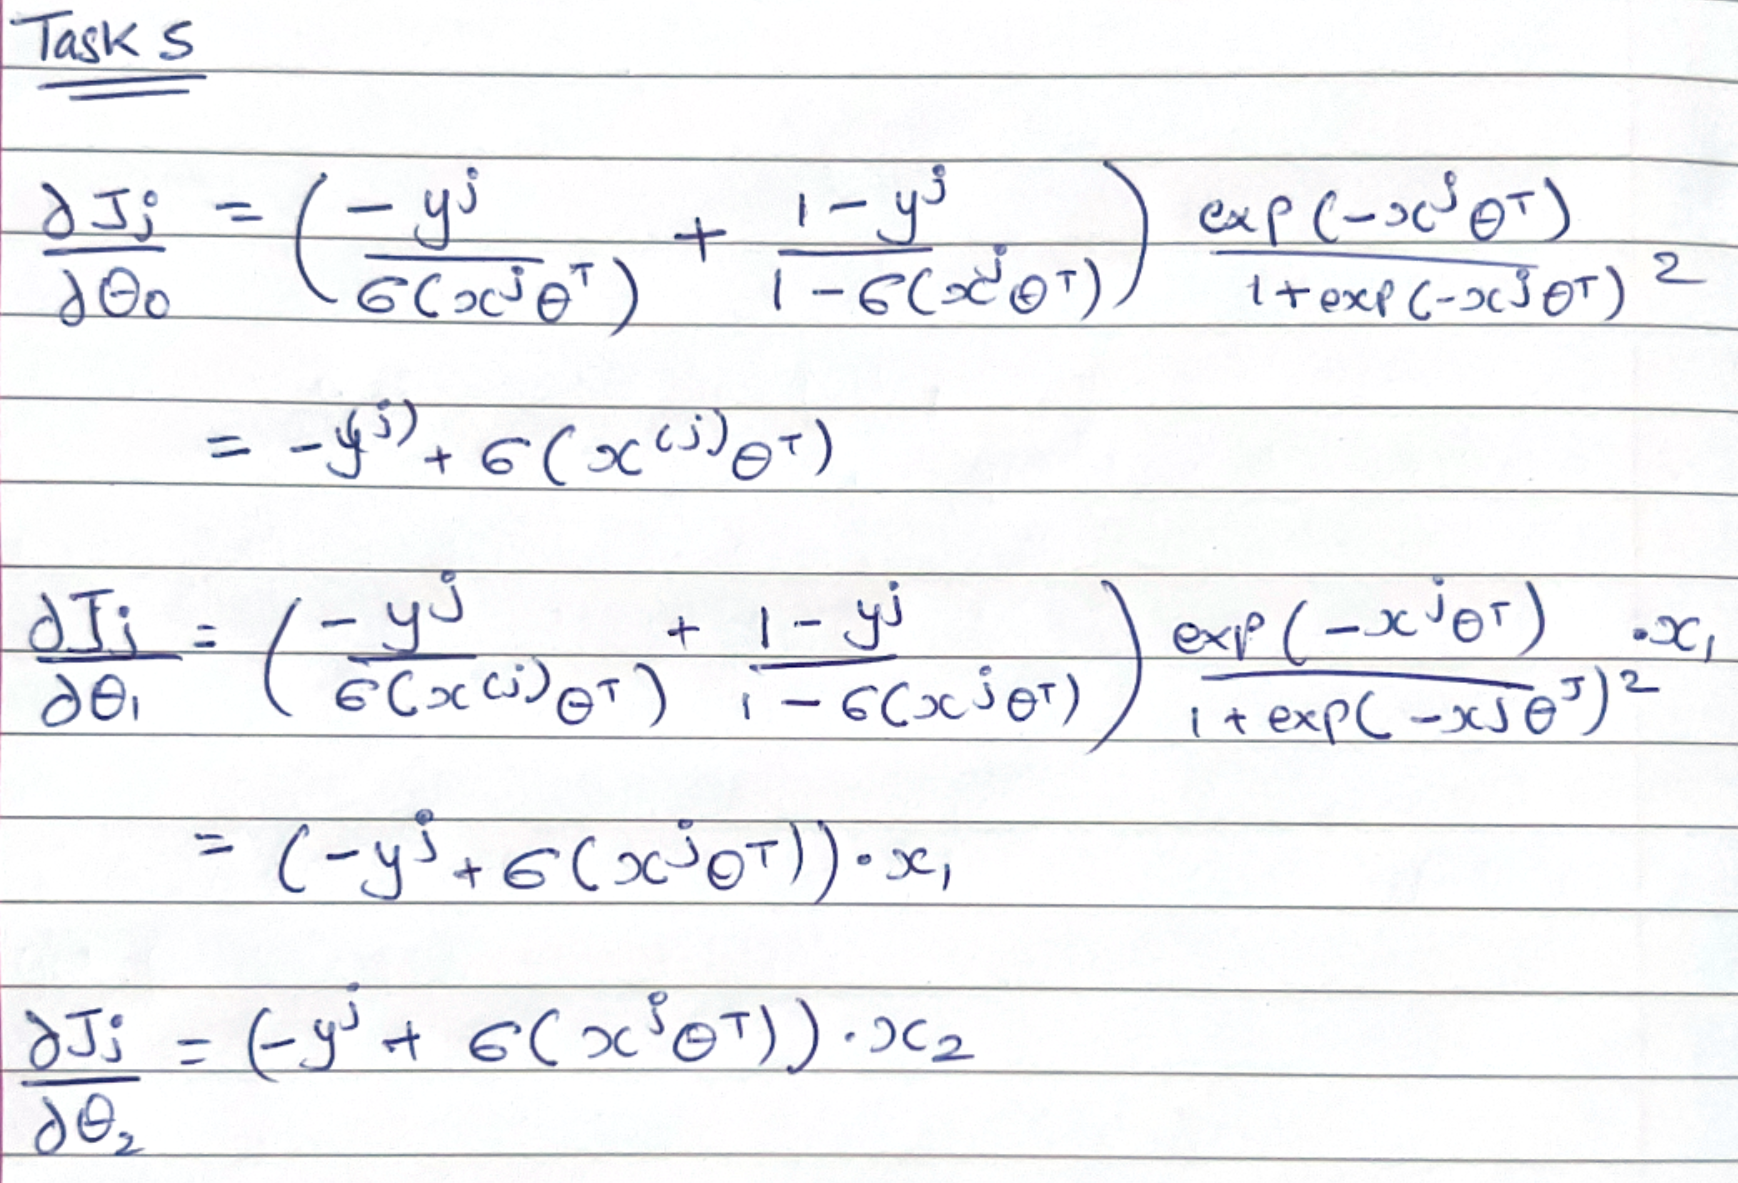

In [53]:
from IPython.display import Image
Image(filename="/content/image1.png")

### **Task 6**
Code:

```
    def train(self, X, Y, initStep=1.0, stopTol=1e-4, stopEpochs=5000, plot=None, alpha = 1):
        """ Train the logistic regression using stochastic gradient descent """
        M,N = X.shape;                     # initialize the model if necessary:
        self.classes = np.unique(Y);       # Y may have two classes, any values
        XX = np.hstack((np.ones((M,1)),X)) # XX is X, but with an extra column of ones
        YY = ml.toIndex(Y,self.classes);   # YY is Y, but with canonical values 0 or 1
        if len(self.theta)!=N+1: self.theta=np.random.rand(N+1);
        # init loop variables:
        epoch=0; done=False; Jnll=[]; J01=[];
        while not done:
            stepsize, epoch = initStep*2.0/(2.0+epoch), epoch+1; # update stepsize
            # Do an SGD pass through the entire data set:
            for i in np.random.permutation(M):
                ri = self.theta[0] + self.theta[1] * X[i,0] + self.theta[2] * X[i,1]

                si = 1/(1 + np.exp(-ri))
                
                theta1Grad = -YY[i] * (1 - si) + (1 - YY[i]) * si
                theta2Grad = -YY[i] * (1 - si) * X[i,0] + (1 - YY[i]) * si * X[i,0]
                theta3Grad = -YY[i] * (1 - si) * X[i,1] + (1 - YY[i]) * si * X[i,1]
                    
                gradi = np.array([theta1Grad, theta2Grad, theta3Grad])
               
                self.theta -= stepsize * gradi;  # take a gradient step

            J01.append(self.err(X,Y) )  # evaluate the current error rate

#            ## TODO: compute surrogate loss (logistic negative log-likelihood)
#            ##  Jsur = sum_i [ (log si) if yi==1 else (log(1-si)) ]

            Jsur = np.sum([np.log(si) if YY[i] == 1 else np.log(1-si)])
            Jnll.append(Jsur/M)
                
            ## For debugging: you may want to print current parameters & losses
            # print self.theta, ' => ', Jsur[-1], ' / ', J01[-1]  
            # raw_input()   # pause for keystroke

            # TODO check stopping criteria: exit if exceeded # of epochs ( > stopEpochs)
            if (epoch > stopEpochs):
                done = True
            if (epoch > 1 and abs(Jnll[-2]-Jnll[-1]) < stopTol):
                done = True
                
        plt.figure(1); plt.plot(Jnll,'b-',J01,'r-'); plt.draw();    # plot losses
        if N==2: plt.figure(2); self.plotBoundary(X,Y); plt.draw(); # & predictor if 2D
        plt.pause(.01);  
```

### **Task 7**

Run train for your logistic regression classifier on both data sets (A and B).

For my parameters for Set A, I chose XA and YA. For set B, I chose XB and YB

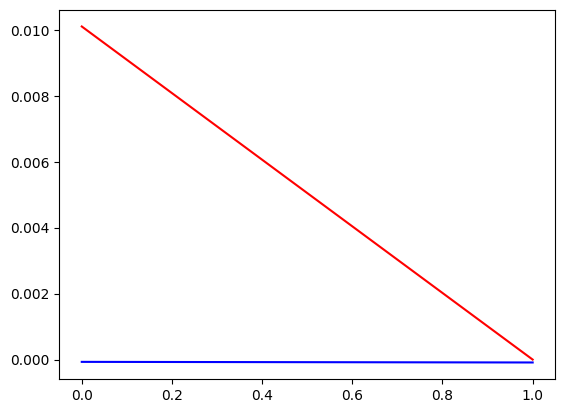

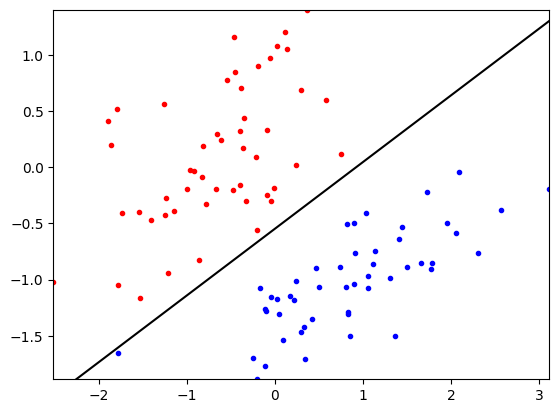

In [68]:
learner.train(XA,YA)

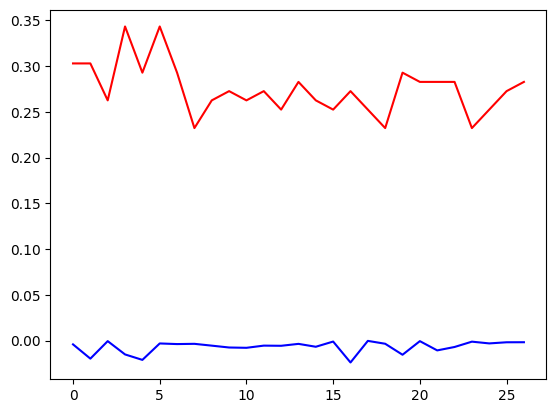

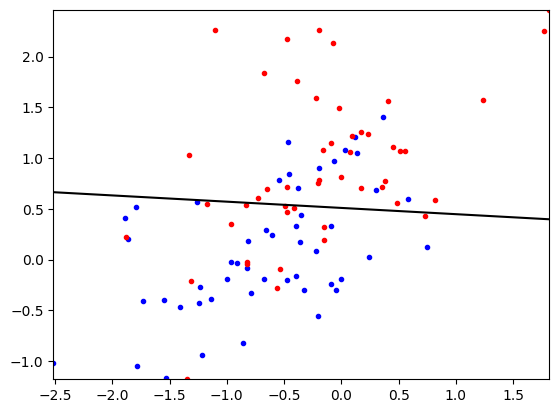

In [67]:
learnerB.train(XB,YB)

## Task 8

Implementing the train function for L1 regularization.



```
    def trainL1(self, X, Y, initStep=1.0, stopTol=1e-4, stopEpochs=5000, plot=None, alpha = 1):
        """ Train the logistic regression using stochastic gradient descent """
        M,N = X.shape;                     # initialize the model if necessary:
        self.classes = np.unique(Y);       # Y may have two classes, any values
        XX = np.hstack((np.ones((M,1)),X)) # XX is X, but with an extra column of ones
        YY = ml.toIndex(Y,self.classes);   # YY is Y, but with canonical values 0 or 1
        if len(self.theta)!=N+1: self.theta=np.random.rand(N+1);
        # init loop variables:
        epoch=0; done=False; Jnll=[]; J01=[];
        while not done:
            stepsize, epoch = initStep*2.0/(2.0+epoch), epoch+1; # update stepsize
            # Do an SGD pass through the entire data set:
            for i in np.random.permutation(M):
                ri = 1.0 / (1.0 + np.exp(-XX[i].dot(self.theta))); # TODO: compute linear response r (x) LL loss
                gradi = (ri-YY[i])*XX[i,:] # TODO: compute gradient of N
                gradi =+ alpha*((self.theta>=0)*2-1)

                self.theta -= stepsize * gradi;  # take a gradient step

            J01.append( self.err(X,Y) )  # evaluate the current error rate

            ## TODO: compute surrogate loss (logistic negative log-likelihood)

            #Jsur = np.sum([np.log(si) if YY[i] == 1 else np.log(1-si)])
            ##  Jsur = sum_i [ (log si) if yi==1 else (log(1-si)) ]
            
            z = 1.0/(1.0+np.exp(-(XX.dot(self.theta))))
            Jtemp = -np.mean(YY*np.log(z) + (1-YY)*np.log(1-z) )+np.mean(alpha*(np.abs(self.theta)))
            Jnll.append(Jtemp) # TODO evaluate the current NLL loss
                
            ## For debugging: you may want to print current parameters & losses
            # print self.theta, ' => ', Jsur[-1], ' / ', J01[-1]  
            # raw_input()   # pause for keystroke

            # TODO check stopping criteria: exit if exceeded # of epochs ( > stopEpochs)
            if (epoch > stopEpochs):
                done = True
            if (epoch > 1 and abs(Jnll[-2]-Jnll[-1]) < stopTol):
                done = True
        '''        
        if (plot):
            plt.figure(1); plt.plot(Jnll,'b-',J01,'r-'); plt.draw();    # plot losses
            if N==2: plt.figure(2); self.plotBoundary(X,Y); plt.draw(); # & predictor if 2D
            plt.pause(.01);                    # let OS draw the plot
        '''
```



In [62]:
alphas = [0.01, 0.1, 1, 2, 5, 10]

for i in alphas:
    learnerReg = logisticClassify2();
    learnerReg.theta = np.array([0.5,-0.25,1])
    #print("Alpha : ", i)
    learnerReg.trainL1(XA, YA,initStep=0.1,stopEpochs=100, alpha = i)
    #print(learnerReg.err)
    print("Alphas: ", i, "\n Weights: ", learnerReg.theta, "Training error: ", learnerReg.err(XA,YA))

Alphas:  0.01 
 Weights:  [1.95674703e-05 1.94180709e-05 1.66997679e-01] Training error:  0.24242424242424243
Alphas:  0.1 
 Weights:  [-0.00091029 -0.00091029 -0.00091029] Training error:  0.48484848484848486
Alphas:  1 
 Weights:  [ 0.01269342  0.00033689 -0.01269342] Training error:  0.5454545454545454
Alphas:  2 
 Weights:  [-0.02376901 -0.00146909 -0.00151793] Training error:  0.5050505050505051
Alphas:  5 
 Weights:  [ 2.03728723e-07  9.80378811e-03 -2.03728723e-07] Training error:  0.8383838383838383
Alphas:  10 
 Weights:  [-1.96075762e-02  1.96077625e-02  4.07457446e-07] Training error:  0.7070707070707071


Here, we observe that the training error increases with increase in alpha value. Hence, Ideal value for alpha from the above data should be 0.01

In [63]:
alphas = [0.01, 0.1, 1, 2, 5, 10]

for i in alphas:
    learnerReg = logisticClassify2();
    learnerReg.theta = np.array([0.5,-0.25,1])
    #print("Alpha : ", i)
    learnerReg.trainL1(XB, YB,initStep=0.1,stopEpochs=100, alpha = i)
    #print(learnerReg.err)
    print("Alphas: ", i, "\n Weights: ", learnerReg.theta, "Training error: ", learnerReg.err(XB,YB))

Alphas:  0.01 
 Weights:  [4.09906593e-02 3.12465312e-06 5.40990659e-01] Training error:  0.32323232323232326
Alphas:  0.1 
 Weights:  [-0.00166667 -0.00166667 -0.00166667] Training error:  0.6262626262626263
Alphas:  1 
 Weights:  [-1.19531311e-05 -9.07971543e-03  1.19531311e-05] Training error:  0.5959595959595959
Alphas:  2 
 Weights:  [-3.92151524e-03  6.01489775e-08  8.14914892e-08] Training error:  0.494949494949495
Alphas:  5 
 Weights:  [ 2.03728723e-07  9.80378811e-03 -2.03728723e-07] Training error:  0.40404040404040403
Alphas:  10 
 Weights:  [-1.96075762e-02  1.96077625e-02  4.07457446e-07] Training error:  0.46464646464646464


The output of training errors were quite random. With more different values of alpha, a particular alpha cannot be decided. But 0.01 should be the closet to alpha value.

## Task 9
Implementing the train function for L2 regularization.



```

    def trainL2(self, X, Y, initStep=1.0, stopTol=1e-4, stopEpochs=5000, plot=None, alpha = 1):
        """ Train the logistic regression using stochastic gradient descent """
        M,N = X.shape;                     # initialize the model if necessary:
        self.classes = np.unique(Y);       # Y may have two classes, any values
        XX = np.hstack((np.ones((M,1)),X)) # XX is X, but with an extra column of ones
        YY = ml.toIndex(Y,self.classes);   # YY is Y, but with canonical values 0 or 1
        if len(self.theta)!=N+1: self.theta=np.random.rand(N+1);
        # init loop variables:
        epoch=0; done=False; Jnll=[]; J01=[];
        while not done:
            stepsize, epoch = initStep*2.0/(2.0+epoch), epoch+1; # update stepsize
            # Do an SGD pass through the entire data set:
            for i in np.random.permutation(M):
                ri = 1.0 / (1.0 + np.exp(-XX[i].dot(self.theta))); # TODO: compute linear response r (x) LL loss
                gradi = (ri-YY[i])*XX[i,:] # TODO: compute gradient of N
                gradi =+ 2*alpha*self.theta

                self.theta -= stepsize * gradi;  # take a gradient step

            J01.append( self.err(X,Y) )  # evaluate the current error rate

            ## TODO: compute surrogate loss (logistic negative log-likelihood)

            #Jsur = np.sum([np.log(si) if YY[i] == 1 else np.log(1-si)])
            ##  Jsur = sum_i [ (log si) if yi==1 else (log(1-si)) ]
            z = 1.0/(1.0+np.exp(-(XX.dot(self.theta))))
            Jtemp = -np.mean(YY*np.log(z) +(1-YY)*np.log(1-z))+np.mean(alpha*(np.square(self.theta)))
            Jnll.append(Jtemp) # TODO evaluate the current NLL loss
                
            ## For debugging: you may want to print current parameters & losses
            # print self.theta, ' => ', Jsur[-1], ' / ', J01[-1]  
            # raw_input()   # pause for keystroke

            # TODO check stopping criteria: exit if exceeded # of epochs ( > stopEpochs)
            if (epoch > stopEpochs):
                done = True
            if (epoch > 1 and abs(Jnll[-2]-Jnll[-1]) < stopTol):
                done = True
        '''        
        if (plot):
            plt.figure(1); plt.plot(Jnll,'b-',J01,'r-'); plt.draw();    # plot losses
            if N==2: plt.figure(2); self.plotBoundary(X,Y); plt.draw(); # & predictor if 2D
            plt.pause(.01);                    # let OS draw the plot
        '''

```



In [64]:
alphas = [0.01, 1, 2, 3, 5]

for i in alphas:
    learnerReg = logisticClassify2();
    learnerReg.theta = np.array([0.5,-0.25,1])
    learnerReg.trainL2(XA, YA,initStep=0.1,stopEpochs=100, alpha = i)
    print("\n Alphas: ", i, "\n Weights: ", learnerReg.theta, "Training error: ", learnerReg.err(XA,YA))


 Alphas:  0.01 
 Weights:  [ 0.09445277 -0.04722639  0.18890555] Training error:  0.050505050505050504

 Alphas:  1 
 Weights:  [ 8.95851342e-17 -4.47925671e-17  1.79170268e-16] Training error:  0.050505050505050504

 Alphas:  2 
 Weights:  [ 2.51643071e-36 -1.25821535e-36  5.03286142e-36] Training error:  0.050505050505050504

 Alphas:  3 
 Weights:  [ 2.18717198e-62 -1.09358599e-62  4.37434396e-62] Training error:  0.050505050505050504

 Alphas:  5 
 Weights:  [0. 0. 0.] Training error:  0.5050505050505051


In [65]:
alphas = [0.01, 0.1, 1, 2, 5]

for i in alphas:
    learnerReg = logisticClassify2();
    learnerReg.theta = np.array([0.5,-0.25,1])
    learnerReg.trainL2(XB, YB,initStep=0.1,stopEpochs=1000, alpha = i)
    print("\n Alphas: ", i, "\n Weights: ", learnerReg.theta, "Training error: ", learnerReg.err(XB,YB))


 Alphas:  0.01 
 Weights:  [ 0.2049022  -0.1024511   0.40980441] Training error:  0.46464646464646464

 Alphas:  0.1 
 Weights:  [ 0.00034257 -0.00017129  0.00068514] Training error:  0.46464646464646464

 Alphas:  1 
 Weights:  [ 8.95851342e-17 -4.47925671e-17  1.79170268e-16] Training error:  0.46464646464646464

 Alphas:  2 
 Weights:  [ 2.51643071e-36 -1.25821535e-36  5.03286142e-36] Training error:  0.46464646464646464

 Alphas:  5 
 Weights:  [0. 0. 0.] Training error:  0.494949494949495


Training error remains approximatly the same for different values of alpha.

### **Task 10**


* To avoid overfitting, L1 regularization calculates the median of the dataset and L2 regularization calculates the mean of the dataset.
* As we can see from the formula of L1 and L2 regularization, the penalty term in cost function of L1 regularization is the absolute value of weight(Wi) parameters, while L2 regularization adds the squared value of weights(Wi) in the cost function.
* Also, in L2 training error decreases with increase in the value of alpha.
* Since error for minimum value of alpha is lesser in L1 regularization (relatively perfect fit), it can be said that L1
regularization works better for dataset A.
* For dataset B, none of the tried approaches work well because the data cannot be separated by a single line.


## Statement of Collarboration

1. https://www.ibm.com/topics/logistic-regression#:~:text=Logistic%20regression%20estimates%20the%20probability,bounded%20between%200%20and%201.
2. https://www.codingninjas.com/studio/library/applying-logistic-regression-on-iris-dataset